# Observations and Analysis:

1) Drawing on large trial size, Copomulin was the most effective drug in terms of decreasing tumor volume versus its leading competitors.  
2) Tumor volume with Copomulin mice decreased over time (see line plot).
3) Drug trials were distributed fairly equally between male and female mice (see pie charts)



## Dependencies and starter code

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# look at smaple data and determine best way to combine
# mouse_metadata.head()
# study_results.head()

# Create a clean DataFrame by dropping the duplicate mouse by its ID. Check the number of mice.
#Combine the data into a single dataset, merge on Mouse ID
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
combined_data.head()

# Check for blank data
# combined_data.count()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
#DataFrames

mouse_df = pd.read_csv("Mouse_metadata.csv")
study_df = pd.read_csv("Study_results.csv")

In [61]:
df = pd.merge(mouse_df, study_df, on="Mouse ID")
df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


## Summary statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Create inital summary table with Drug Regimes and counts (trials)
summarystats = pd.DataFrame(combined_data.groupby("Drug Regimen").count())

#Use groupby to create summary stats by drug regime, add results into columns in summarystats

summarystats["Mean"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())

summarystats["SEM"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean up columns, just keeping a count column for some of the graphs below
summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
summarystats = summarystats.rename(columns = {"Mouse ID" : "Trials"})

summarystats.head()



,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


In [63]:
# Groups
regimen_group = df.groupby(["Drug Regimen"])
mouse_group = df.groupby(["Mouse ID"])
gender_group = df.groupby(["Sex"])
regi_gender_group = df.groupby(["Drug Regimen","Sex"])
regi_mouse_group = df.groupby(["Drug Regimen","Mouse ID"])

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumor_summary = pd.DataFrame({
    "Tumor Mean":regimen_group['Tumor Volume (mm3)'].mean(),
    "Tumor Median":regimen_group['Tumor Volume (mm3)'].median(),
    "Tumor Variance":regimen_group['Tumor Volume (mm3)'].var(),
    "Tumor Stdev":regimen_group['Tumor Volume (mm3)'].std(),
    "Tumor SEM":regimen_group['Tumor Volume (mm3)'].sem(),
})
tumor_summary

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Stdev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

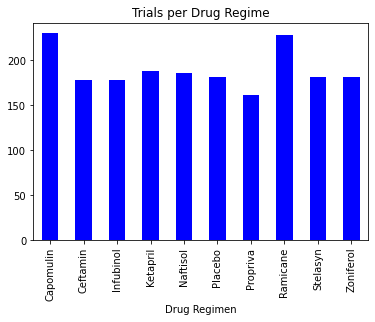

<Figure size 432x288 with 0 Axes>

In [64]:
# Generate a bar plot showing number of mice for each treatment regimen using pandas

# Filter the DataFrame down only to those columns to chart
datapoints = summarystats[["Trials"]]

# Use DataFrame.plot() in order to create a bar chart of the data
datapoints.plot(kind="bar", figsize=(6,4), color = "b", legend=False)

# Set a title for the chart
plt.title("Trials per Drug Regime")

plt.show()
plt.tight_layout()

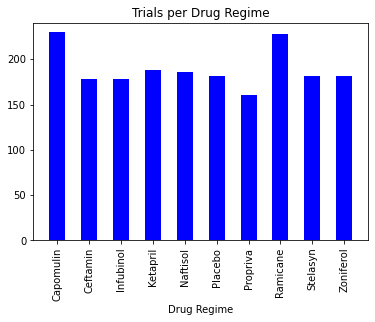

In [65]:
# Generate a bar plot showing number of mice for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, datapoints["Trials"], color = "b", width = .5)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints["Trials"])+10)

# Set a Title and labels
plt.title("Trials per Drug Regime")
plt.xlabel("Drug Regime")

# Save our graph and show the grap
plt.show()

## Pie plots

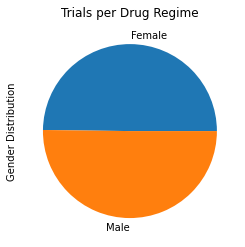

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_output = gender_group['Mouse ID'].unique()
gender_map = gender_output.map(len)
gender_pie = gender_map.plot.pie(y='Sex')
plt.ylabel('Gender Distribution')

# Set a title for the chart
plt.title("Trials per Drug Regime")

# Save an image of our chart and print the final product to the screen
plt.show()

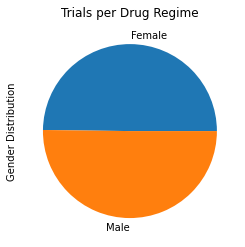

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_map, labels=["Female","Male"])
plt.ylabel('Gender Distribution')

# Set a title for the chart
plt.title("Trials per Drug Regime")

# Save an image of our chart and print the final product to the screen
plt.show()

## Quartiles, outliers and boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
 
# Grab just data for the 4 smallest mean tumor volume regimens
filtered_df = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") | (combined_data["Drug Regimen"] == "Ramicane") | (combined_data["Drug Regimen"] == "Ceftamin") | (combined_data["Drug Regimen"] == "Propriva"), :]

# Sort by Timpepoints based on the latest values
filtered_df = filtered_df.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='first')
    
# Determine quartiles
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print a filtered dataframe of any outliers
outliers_df = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] > upper_bound) | (filtered_df['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [67]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
c_df = combine_ms.loc[combine_ms["Drug Regimen"] == "Capomulin",:]
r_df = combine_ms.loc[combine_ms["Drug Regimen"] == "Ramicane", :]
i_df = combine_ms.loc[combine_ms["Drug Regimen"] == "Infubinol", :]
ce_df = combine_ms.loc[combine_ms["Drug Regimen"] == "Ceftamin", :]

NameError: name 'combine_ms' is not defined

In [69]:
#C outliers/ 
c_tumors = c_max_merge["Tumor Volume (mm3)"]

c_quartiles = c_tumors.quantile([.25,.5,.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq-c_lowerq

c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)
print(f"Capomulin potential outliers could be values below {c_lower_bound} and above {c_upper_bound} could be outliers.")

#R Outliers/ 
r_tumors = r_max_merge["Tumor Volume (mm3)"]

r_quartiles = r_tumors.quantile([.25,.5,.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq-r_lowerq

r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
print(f"Ramicane potential outliers could be values below {r_lower_bound} and above {r_upper_bound} could be outliers.")
#I Outliers/
i_tumors = i_max_merge["Tumor Volume (mm3)"]

i_quartiles = i_tumors.quantile([.25,.5,.75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq-i_lowerq

i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
print(f"Infubinol potential outliers could be values below {i_lower_bound} and above {i_upper_bound} could be outliers.")

#CE Outliers/
ce_tumors = ce_max_merge["Tumor Volume (mm3)"]

ce_quartiles = ce_tumors.quantile([.25,.5,.75])
ce_lowerq = ce_quartiles[0.25]
ce_upperq = ce_quartiles[0.75]
ce_iqr = ce_upperq-ce_lowerq

ce_lower_bound = ce_lowerq - (1.5*ce_iqr)
ce_upper_bound = ce_upperq + (1.5*ce_iqr)
print(f"Ceftamin potential outliers could be values below {ce_lower_bound} and above {ce_upper_bound} could be outliers.")


NameError: name 'c_max_merge' is not defined

In [70]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
        
    # add subset 
    
    # Determine outliers using upper and lower bounds

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Calculate the IQR and quantitatively determine if there are any potential outliers.
 
# Grab just data for the 4 smallest mean tumor volume regimens
filtered_df = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") | (combined_data["Drug Regimen"] == "Ramicane") | (combined_data["Drug Regimen"] == "Ceftamin") | (combined_data["Drug Regimen"] == "Propriva"), :]

# Sort by Timpepoints based on the latest values
filtered_df = filtered_df.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='first')
    
# Determine quartiles
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print a filtered dataframe of any outliers
outliers_df = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] > upper_bound) | (filtered_df['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df

# Not finding any outliers. 

SyntaxError: invalid syntax (<ipython-input-70-54d0baee9570>, line 18)

In [71]:
# Extract the top 4 regimenes from the data frame in order to perform IQR test on each
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# REMINDER: Best Item List Items: ['Capomulin','Ceftamin','Infubinol','Ramicane']

tumor_vols = [regi_output_df.loc[regi_output_df['Drug Regimen'] == best_regimens[i], 'Tumor Volume (mm3)'] for i in range(4)]

for i in range(4):
    quartiles = tumor_vols[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The IQR for regimen at 'Best Regimen' List Item {i+1} is {iqr}'.")
    if (lower_bound < tumor_vols[i].min()) & (upper_bound > tumor_vols[i].max()):
        print(f"\tThere are no outliers at 'Best Regimen' List Item {i+1}'.")
    else:
        print(f"\tThere is at least 1 outlier at 'Best Regimen' List Item {i+1}'.")

NameError: name 'regi_output_df' is not defined

In [4]:
Tumor_Volume = filtered_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

NameError: name 'filtered_df' is not defined

In [6]:
# Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

Tumor_Volume = filtered_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

Tumor_Volume = filtered_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

Tumor_Volume = filtered_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

NameError: name 'filtered_df' is not defined

## Line and scatter plots

In [5]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin.
mouse_1_vol = (df['Tumor Volume (mm3)'][10:20].to_list())
mouse_1_time = (df['Timepoint'][10:20].to_list())
plt.plot(mouse_1_time, mouse_1_vol)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume of a Mouse over Time")

NameError: name 'df' is not defined

Text(0.5, 1.0, 'Mouse Weights against Average Tumor Volumes')

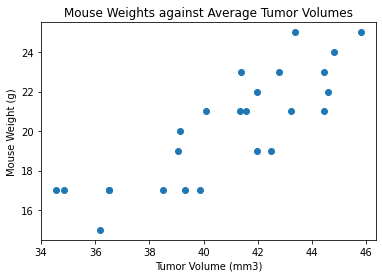

In [83]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen.
mouse_sub_list = df[df['Drug Regimen'] == 'Capomulin']
mouse_sub_list_id = mouse_sub_list['Mouse ID'].unique()
mouse_sub_list_avg_vol = pd.Series([mouse_group.get_group(m)['Tumor Volume (mm3)'].mean() for m in mouse_sub_list_id])
mouse_sub_list_weight = pd.Series([mouse_group.get_group(m)['Weight (g)'].sum()/mouse_group.get_group(m)['Weight (g)'].count() for m in mouse_sub_list_id])
plt.scatter(mouse_sub_list_avg_vol, mouse_sub_list_weight)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title("Mouse Weights against Average Tumor Volumes")


In [9]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen 

# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')

NameError: name 'Capomulin_df' is not defined

In [8]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen 

# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')


NameError: name 'Capomulin_df' is not defined

In [91]:
#calculate the final tumor value across capomulin, ramicane, infubinol, ceftamin
cap_max = capomulin_df['Tumor Volume (mm3)'].min()

ram_max = ramicane_df['Tumor Volume (mm3)'].min()

inf_max = infubinol_df['Tumor Volume (mm3)'].min()

ceft_max = ceftamin_df['Tumor Volume (mm3)'].min()

NameError: name 'capomulin_df' is not defined

In [95]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen 

# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')

NameError: name 'Capomulin_df' is not defined